# Notebook de dataviz sur le dataset ChampySeed
### Localisation d'un set de champignons sur une carte avec Bokeh
### Visualisation de la densité du dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Chargement du fichier contenant les coord géographiques

In [2]:
df = pd.read_csv("C:/Users/bhozj/Documents/Datascientest/ProjetMushrooms/tableau_propre.csv")
df.head()

,Unnamed: 0,id,identifier_y,kingdom,phylum,class,order,family,genus,species,verbatimScientificName,countryCode,decimalLatitude,decimalLongitude,hasCoordinate
0,0,2438770494,https://images.ala.org.au/image/proxyImageThum...,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Hygrophoraceae,Hygrocybe,Hygrocybe hypospoda,Hygrocybe hypospoda,AU,-39.020600,146.336100,True
1,1,2438770494,https://images.ala.org.au/image/proxyImageThum...,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Hygrophoraceae,Hygrocybe,Hygrocybe hypospoda,Hygrocybe hypospoda,AU,-39.020600,146.336100,True
2,2,2434842541,https://images.ala.org.au/image/proxyImageThum...,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Mycenaceae,Mycena,Mycena mulawaestris,Mycena mulawaestris,AU,-37.666667,145.733333,True
3,3,2435361192,https://images.ala.org.au/image/proxyImageThum...,Fungi,Basidiomycota,Agaricomycetes,Russulales,Bondarzewiaceae,Amylosporus,Amylosporus campbellii,Amylosporus campbellii,MM,NaN,NaN,False
4,4,2438837736,https://images.ala.org.au/image/proxyImageThum...,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Agaricaceae,Barcheria,Barcheria willisiana,Barcheria willisiana,AU,-32.176100,121.399700,True


Les coordonnées géographiques étant sous le format WGS84, il faut d'abord les convertir en format "Web Mercator" pour être en mesure de les afficher sur une carte en utilisant Bokeh
Ex de coord WGS84 :  
              Name        Lat        Long  
0        Hygrocybe -39.020600    146.3361  
1           Mycena -37.666667  145.733333  
3        Barcheria -32.176100    121.3997  
4         Beenakia -37.850000       145.7  
5        Clavulina -35.000000    138.6167  

Définition du fonction pour effectuer cette conversion :

In [3]:
def wgs84_to_web_mercator(df, lon="LON", lat="LAT"):
      k = 6378137
      df["x"] = df[lon] * (k * np.pi/180.0)
      df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k

      return df


Extraction des colonnes puis conversion en Web Mercator :

In [4]:
df_geo = df[["genus", "decimalLatitude", "decimalLongitude"]]

df_geo2 = wgs84_to_web_mercator(df_geo, "decimalLongitude", "decimalLatitude")

print(df_geo2)

               genus  decimalLatitude  decimalLongitude             x  \
0          Hygrocybe       -39.020600        146.336100  1.629006e+07   
1          Hygrocybe       -39.020600        146.336100  1.629006e+07   
2             Mycena       -37.666667        145.733333  1.622296e+07   
3        Amylosporus              NaN               NaN           NaN   
4          Barcheria       -32.176100        121.399700  1.351415e+07   
...              ...              ...               ...           ...   
2339811     Laccaria        57.327108         -3.609328 -4.017886e+05   
2339812     Laccaria        57.327108         -3.609328 -4.017886e+05   
2339813    Phellinus        36.593824       -121.834470 -1.356255e+07   
2339814     Laccaria        43.345131         -5.485522 -6.106455e+05   
2339815      Amanita        20.207190        -98.719387 -1.098939e+07   

                    y  
0       -4.724623e+06  
1       -4.724623e+06  
2       -4.532443e+06  
3                 NaN  
4  

<ipython-input-3-0ccdf450ac53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["x"] = df[lon] * (k * np.pi/180.0)
<ipython-input-3-0ccdf450ac53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k


Pour des raisons de performance d'affichage, nous affichons 10 entrées prises au hasard dans le dataset :

In [9]:
df_geo_sample = df_geo2.sample(100) #changer cette valeur pour en voir plus d'un coup
df_geo_sample

,genus,decimalLatitude,decimalLongitude,x,y
594826,Schizopora,49.866665,8.650000,9.629136e+05,6.423217e+06
781649,Tricholoma,58.861469,5.844215,6.505750e+05,8.150505e+06
943913,Rhizopogon,47.467031,-123.845455,-1.378641e+07,6.018641e+06
407299,Suillellus,46.010203,7.199415,8.014352e+05,5.781984e+06
1857033,Mycena,56.644713,9.808549,1.091883e+06,7.687845e+06
...,...,...,...,...,...
942594,Mycena,44.308345,-73.995155,-8.237103e+06,5.513284e+06
1161268,Collybia,41.146830,-74.298863,-8.270912e+06,5.034023e+06
1689568,Chondrostereum,59.197951,17.823551,1.984109e+06,8.223295e+06
2218689,Leratiomyces,34.199532,-118.210651,-1.315915e+07,4.055626e+06


Affichage avec Bokeh de l'échantillon, déplacez-vous sur la carte pour les trouver :

In [10]:
# Importation des fonctions dont l'on se servira pour toutes les figures
from bokeh.plotting import figure, output_notebook, show
from bokeh.tile_providers import get_provider
from bokeh.models import ColumnDataSource, LabelSet


# Précision de l'affichage des graphiques dans des cellules jupyter
output_notebook()

tuile = get_provider("CARTODBPOSITRON")

source = ColumnDataSource(df_geo_sample)

p = figure(x_range = (-1000000, 7000000), # étendue de l'axe des abscisses
           y_range = (-7000000, 9000000), # étendue de l'axe des ordonnées
           x_axis_type = 'mercator',      # Précision du type de l'axis, ici projection mercator qui sert à se repérer sur une 
                                          # carte plane de la Terre
           y_axis_type = 'mercator')      # //

p.add_tile(tuile)  

p.circle(source = source, 
         x = "x", 
         y = "y", 
         color = "blue", 
         size = 2)

labels = LabelSet(x = "x",
                 y = "y",
                 text = "genus",
                  x_offset = 5,
                  y_offset = 5,
                  source =source
                 )

p.add_layout(labels)

show(p)


Loading BokehJS ...

### Visualisation graphique des NaN du Dataset
En noir => La donnée est présente
En clair => Donnée manquante

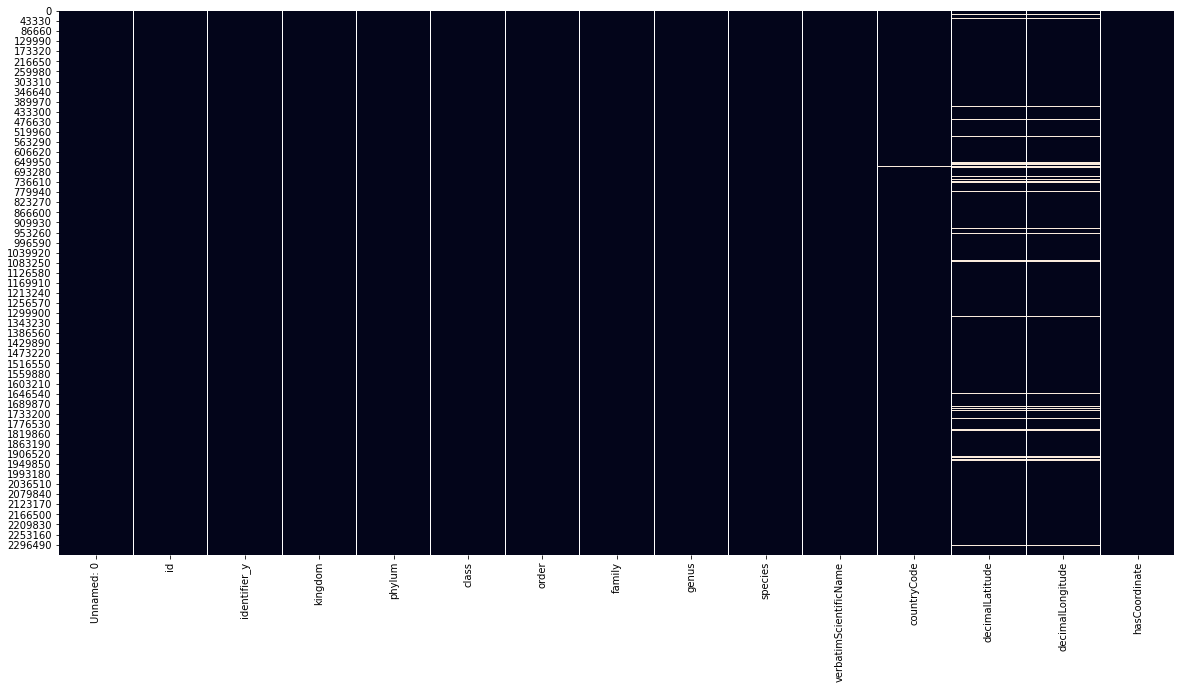

In [8]:
plt.figure(figsize = (20,10))
sns.heatmap(df.isna(), cbar = False);